# Data Visualization: explorando com Seaborn

## Importando base de dados

In [4]:
import pandas as pd
dados = pd.read_csv('tips.csv')
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [12]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}
gorjetas = dados.rename(columns = renomear)
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas


,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Dinner,3
240,27.18,2.00,Sim,Sat,Dinner,2
241,22.67,2.00,Sim,Sat,Dinner,2
242,17.82,1.75,Não,Sat,Dinner,2


In [13]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Análise com o Seaborn

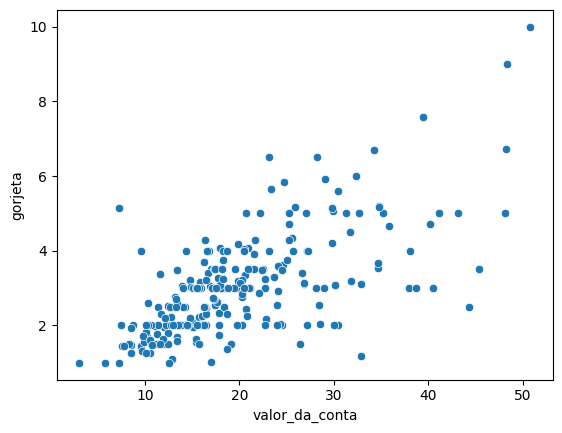

In [18]:
import seaborn as sns
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

In [20]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

### Criando campo porcentagem

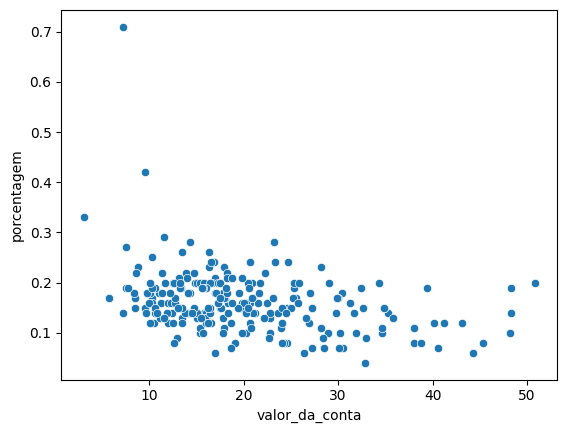

In [22]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

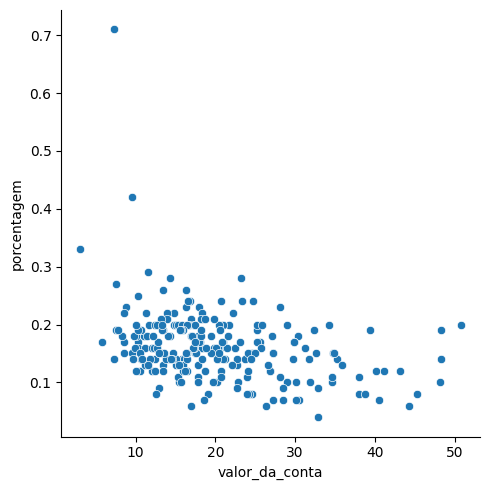

In [23]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

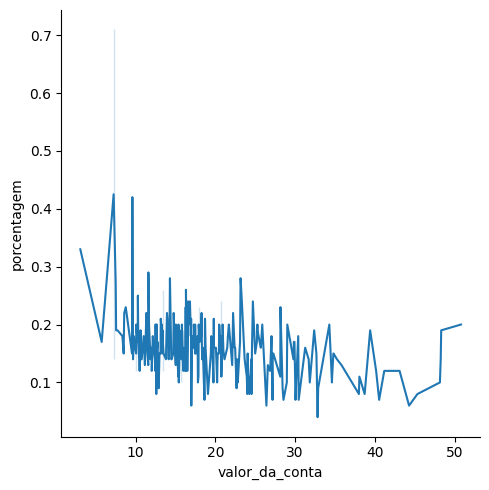

In [24]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

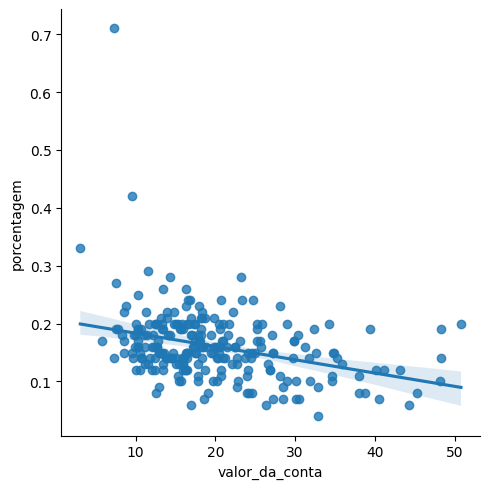

In [25]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

### Análise - Sobremesa

In [26]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


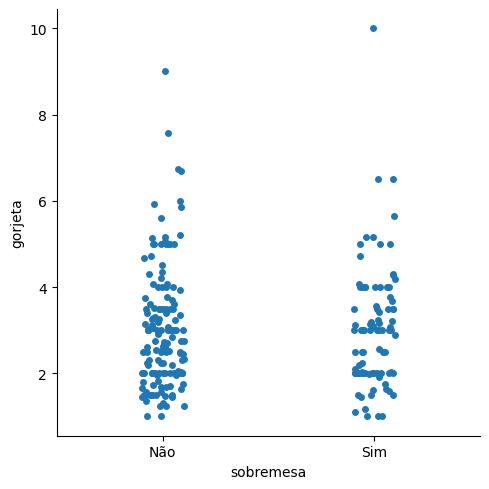

In [28]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas);

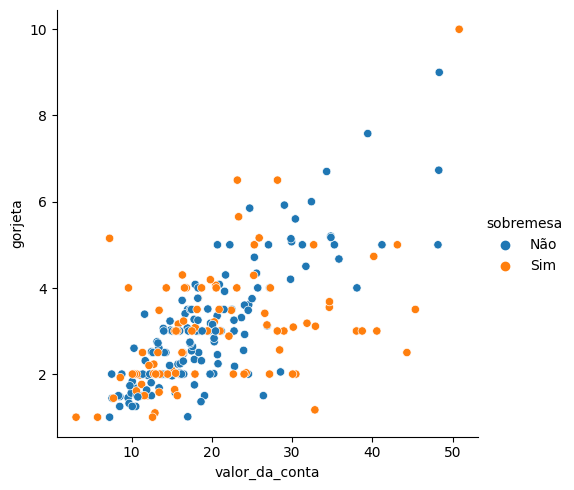

In [30]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas);

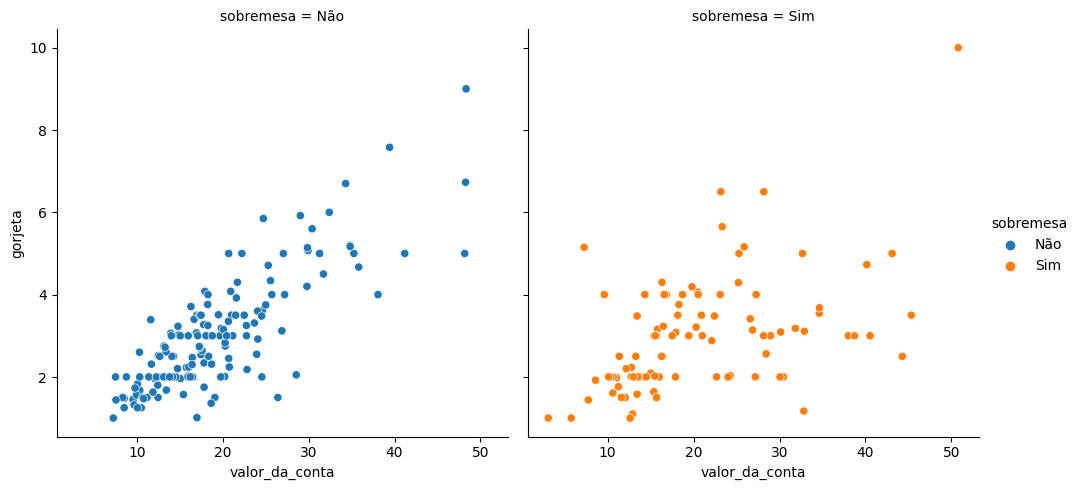

In [31]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas);

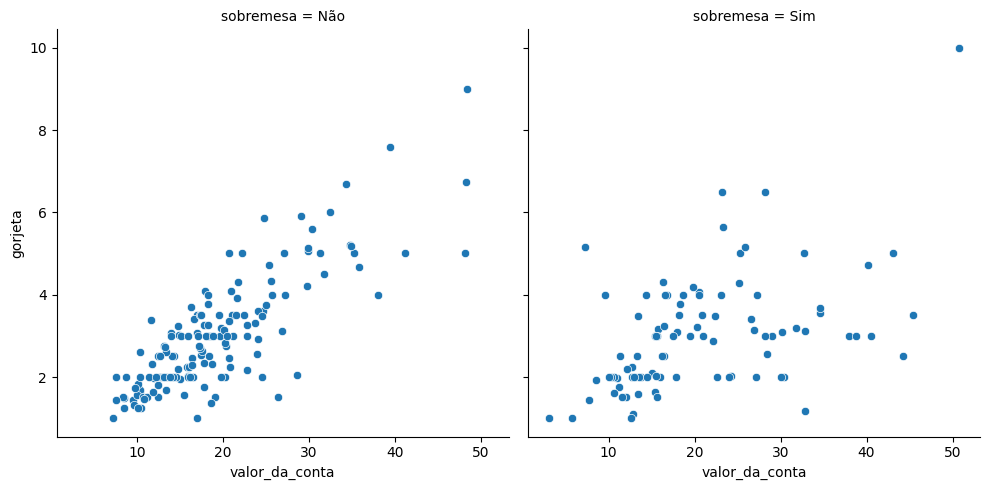

In [32]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas);

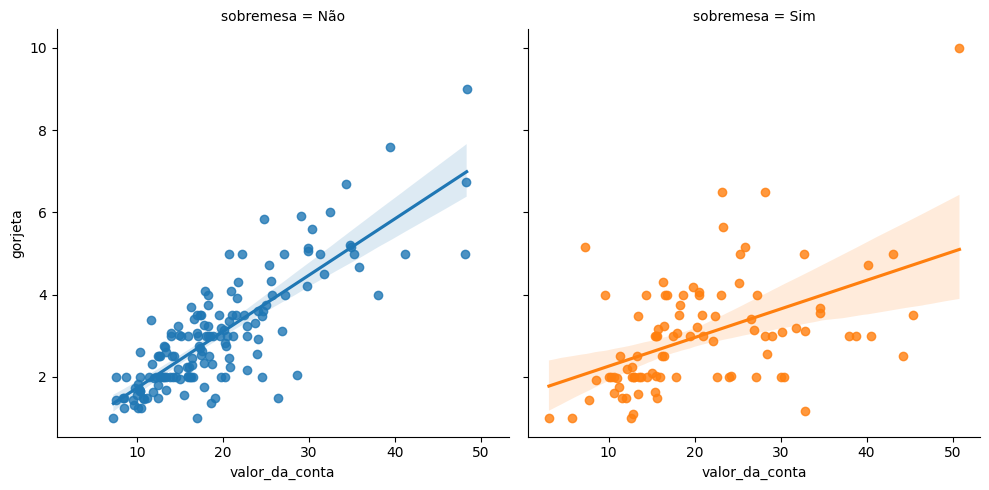

In [33]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas);

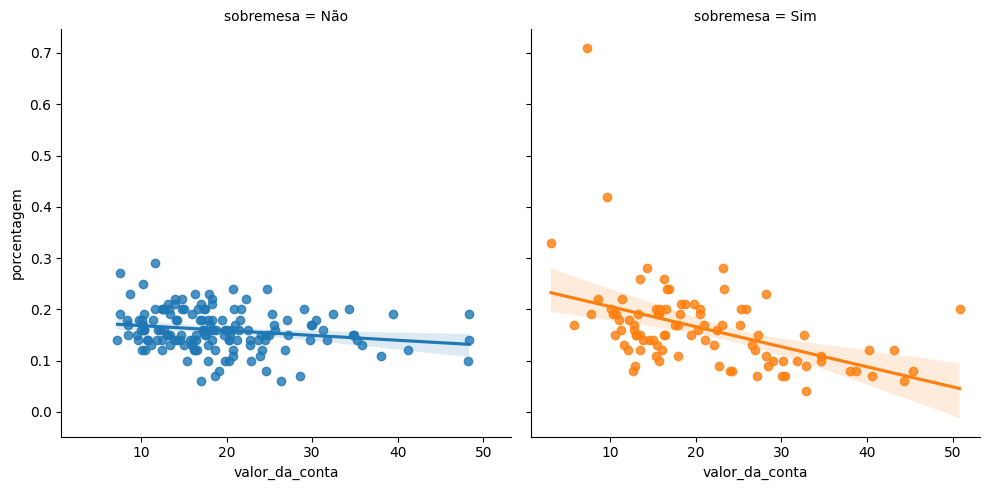

In [34]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas);

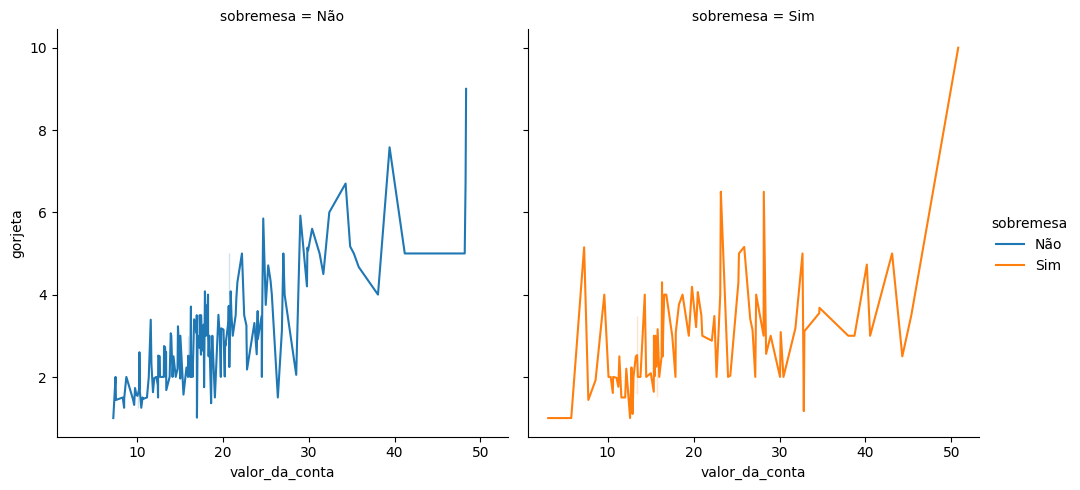

In [35]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas);

### Teste de hipótese
**H<sup>null</sup>:**
A distribuição da taxa da gorjeta é a mesma nos dois grupos

**H<sup>alt</sup>:**
A distribuição da taxa da gorjeta não é a mesma nos dois grupos


In [38]:
from scipy.stats import ranksums

In [39]:
gorjetas.query("sobremesa == 'Sim'").porcentagem

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [42]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [43]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


### Análise - Dia da semana

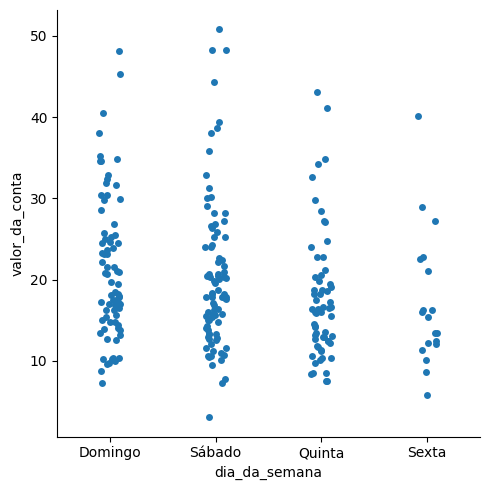

In [45]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas);

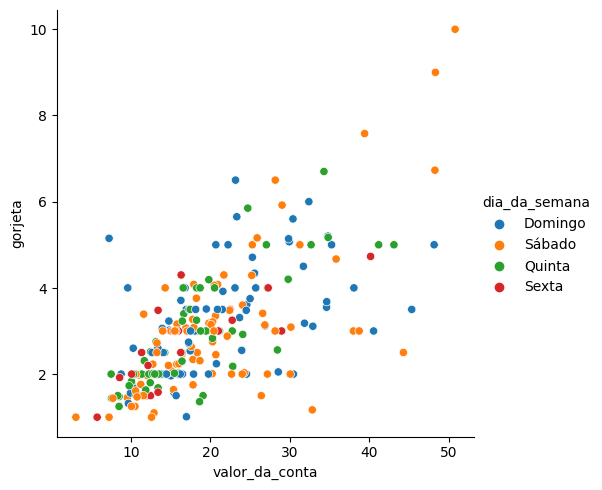

In [46]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas);

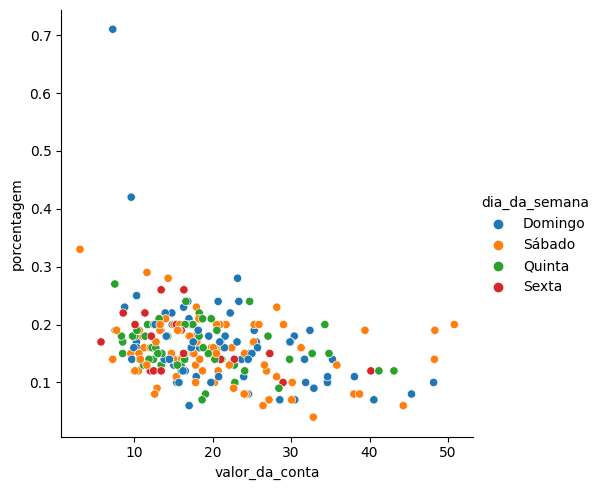

In [47]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas);

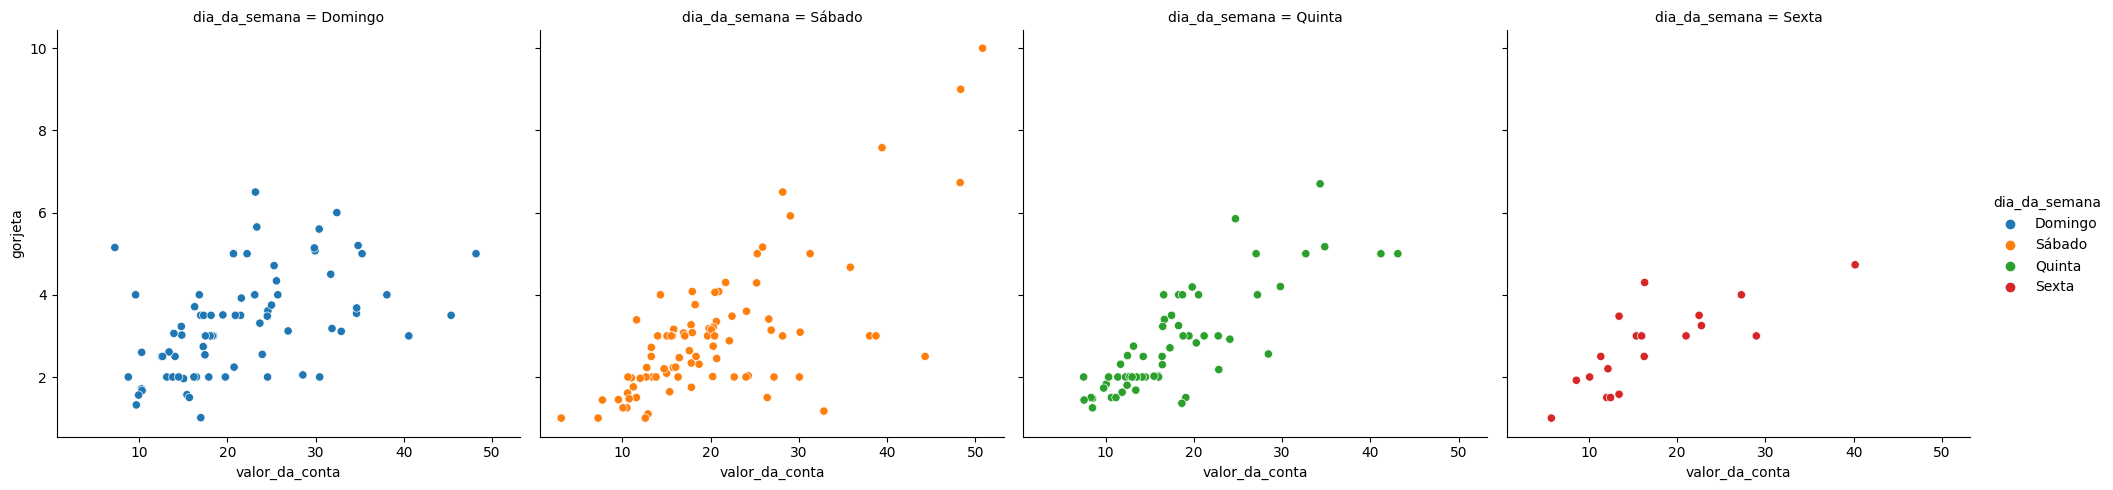

In [48]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

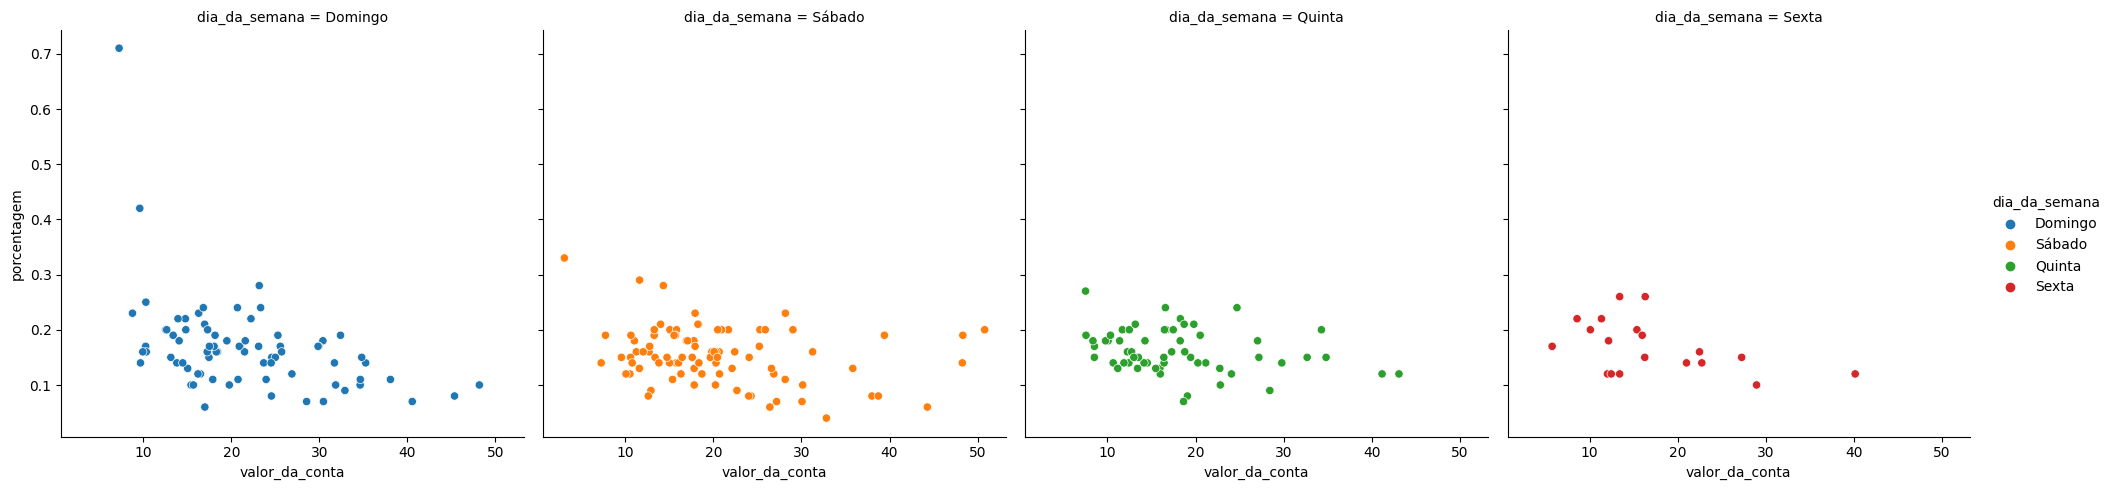

In [49]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

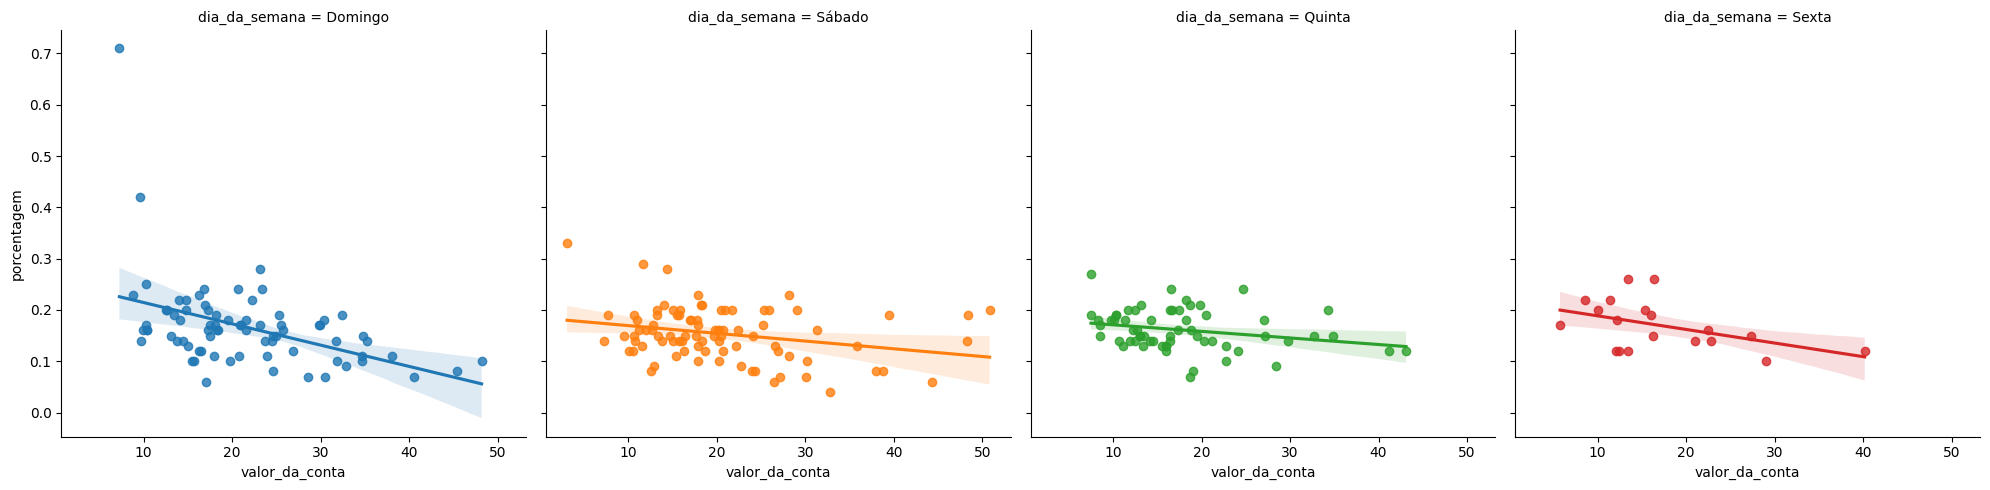

In [50]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [51]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [54]:
gorjetas.groupby(['dia_da_semana']).mean()

/tmp/ipykernel_2934/159429171.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [55]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

/tmp/ipykernel_2934/1513838919.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [57]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de Hipótese

In [59]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

In [60]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


### Teste de hipótese - Hora do dia

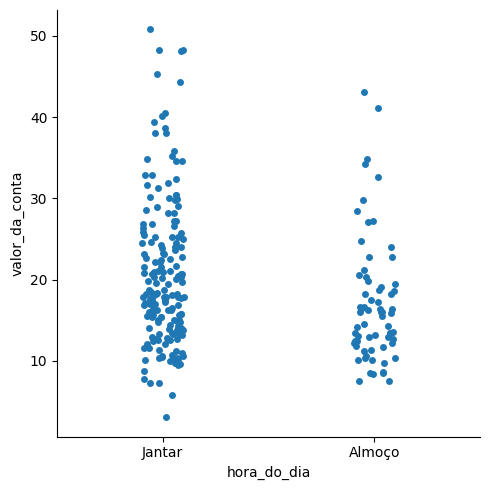

In [61]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

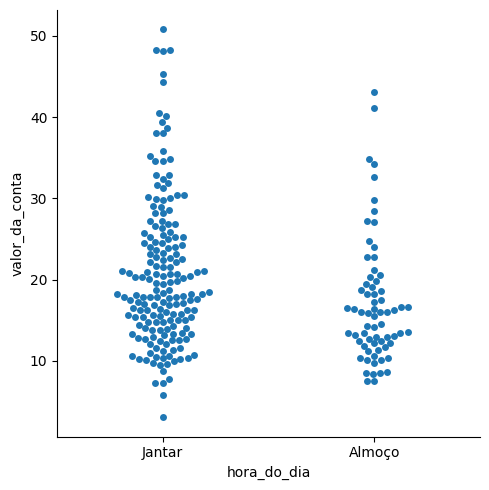

In [62]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot: xlabel='hora_do_dia', ylabel='valor_da_conta'>

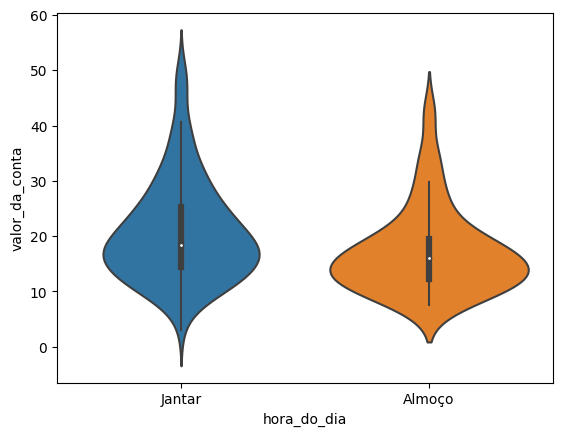

In [63]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot: xlabel='hora_do_dia', ylabel='valor_da_conta'>

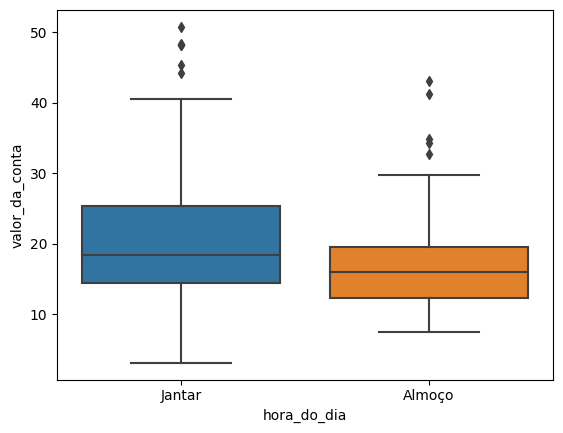

In [64]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

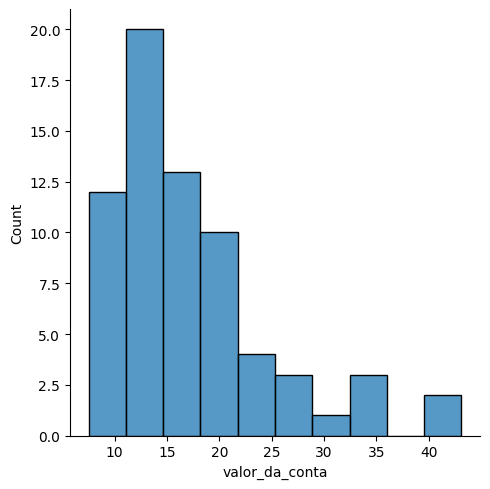

In [67]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
sns.displot(almoco)

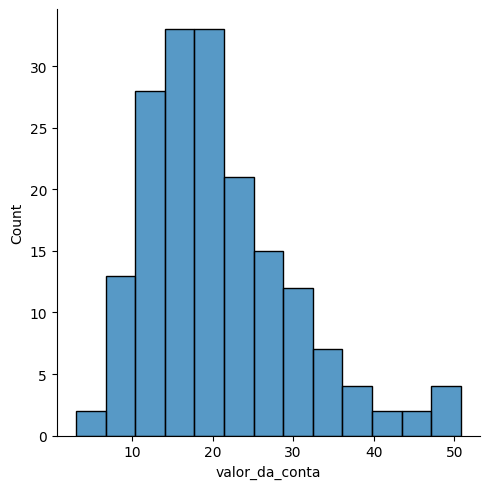

In [68]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
sns.displot(jantar)

### Teste de hipótese 2

In [69]:
gorjetas.groupby(['hora_do_dia']).mean()

/tmp/ipykernel_2934/1714704720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
hora_do_dia,,,,
Almoço,17.168676,2.728088,2.411765,0.163971
Jantar,20.797159,3.102670,2.630682,0.159773


In [70]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

/tmp/ipykernel_2934/932548386.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [74]:
r2 = ranksums(jantar, almoco)
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

In [75]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.2602493995587126
